In [1]:
#標準輸入 & 標準輸出

import sys,re

# sys.argv是一個列表，裡面包含所有命令列參數
# sys.argv[0]是程式自己的名稱
# sys.argv[1]是在命令列中所指定的正規表達式
regex=sys.argv[1]

#針對傳遞到script腳本中的每一行
for line in sys.stdin:
    #如果符合正規表達式，就把他寫道stdout
    if re.search(regex,line):
        sys.stdout.write(line)
        
#line_count.py
import sys

count =0
for line in sys.stdin:
    count+=1

print count

#most_common_words.py
import sys
from collections import Counter

try:
    num_words=int(sys.argv[1])
except:
    print "ysage: most_common_words.py num_words"
    sys.exit(1)

counter=Counter(word.lower() for line in sys.stdin for word in line.strip().split() if word)

for word,count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

##  C:\DataScience>type the_bible.txt | python most_common_words.py 10



0
ysage: most_common_words.py num_words


SystemExit: 1

C:\Users\tan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# read text data

file_for_reading=open('reading_file.txt',"r")

file_for_writing=open('writing_file.txt',"w")

file_for_appending=open('appending_file.txt',"a")

file_for_writing.close()

#automate_close_dat

with open(filename,'r') as f:
    data=function_that_gets_data_from(f)

#data已經關了
process(data)


#逐行
def get_domain(email_address):
    return email_address.lower().split("@")[-1]

with open('email_address.txt','r') as f:
    domain_counts=Counter(get_domain(line.strip())
                         for line in f
                         if "@" in line)

##遇到 tab  ,    import csv

import csv

with open('tab_delimited_stock_prices.txt','rb') as f:
    reader = csv.reader(f,delimiter='\t')
    for row in reader:
        date=row[0]
        symbol=row[1]
        closing_price=float(row[2])
        process(date,symbol,closing_price)

# csv.DictReader  將每行轉換為一個dict

reader=csv.DictReader(f,delimiter='\t')
for row in reader:
    date=row["date"]
    symbol=row["symbol"]
    closing_price=float(row["closing_price"])
    process(date,symbol,closing_price)

IOError: [Errno 2] No such file or directory: 'reading_file.txt'

In [2]:
#從網路擷取數據資料

from bs4 import BeautifulSoup
import requests

html=requests.get("http://example.com").text
soup=BeautifulSoup(html,'html5lib')

#找第一個<p>標籤
first_paragraph = soup.find('p')

first_paragraph_text=soup.p.text
first_paragraph_words=soup.p.text.split()

first_paragraph_id=soup.p['id']
first_paragraph_id2=soup.p.get('id')

paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

important_paragraphs = soup('p',{'class':'important'})
important_paragraphs2= soup('p','important')
important_paragraph3 = [p for p in soup('p') if 'important' in p.get('class',[])]

#找每個div中的span
spans_inside_divs = [span for div in soup('div')
                    for span in div('span')]

KeyError: 'id'

In [4]:
# let's try

url="http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publictionDate$page=1"
soup=BeautifulSoup(requests.get(url).text,'html5lib')

tds=soup('td','thumbtext')
print len(tds)

def is_video(td):
    pricelabels=td('span','pricelabel')
    return (len(pricelabels)==1 and
           pricelabels[0].text.strip().startswith("Video"))

print len([td for td in tds if not is_video(td)])

def book_info(td):
    title = td.find("div","thumbheader").a.text
    by_author=td.find('div','AuthorName').text
    authors=[x.strip() for x in re.sub("^By","",by_author).split(",")]
    isbn_link=td.find('div','thumbheader').a.get("href")
    isbn=re.match("/product/(.*)\.do",isbn_link).groups()[0]
    date=td.find("span","directorydate").text.strip()
    
    return {
        "title":title,
        "authors": authors,
        "isbn":isbn,
        "date":date
    }

from bs4 import BeautifulSoup
import requests
from time import sleep
base_url="http://shop.oreilly.com/category/browse-subjects/data.do?sortby=publicationDate&page="

books=[]

NUM_PAGES=31

for page_num in range(1,NUM_PAGES+1):
    print "souping page",page_num,',',len(books),"found so far"
    url=base_url+str(page_num)
    soup=BeautifulSoup(requests.get(url).text,'html5lib')
    
    for td in soup('td','thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
    
    sleep(30)



30
29
souping page 1 , 0 found so far
souping page 2 , 17 found so far
souping page 3 , 39 found so far
souping page 4 , 56 found so far
souping page 5 , 78 found so far
souping page 6 , 105 found so far
souping page 7 , 130 found so far
souping page 8 , 154 found so far
souping page 9 , 175 found so far
souping page 10 , 199 found so far
souping page 11 , 226 found so far
souping page 12 , 245 found so far
souping page 13 , 272 found so far
souping page 14 , 291 found so far
souping page 15 , 313 found so far
souping page 16 , 340 found so far
souping page 17 , 366 found so far
souping page 18 , 390 found so far
souping page 19 , 415 found so far
souping page 20 , 437 found so far
souping page 21 , 461 found so far
souping page 22 , 489 found so far
souping page 23 , 517 found so far
souping page 24 , 541 found so far
souping page 25 , 568 found so far
souping page 26 , 595 found so far
souping page 27 , 624 found so far
souping page 28 , 650 found so far
souping page 29 , 677 found s

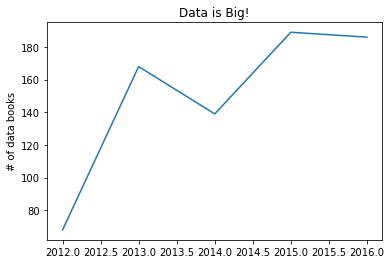

In [5]:
def get_year(book):
    return int(book["date"].split()[1])

year_counts=Counter(get_year(book) for book in books
                   if get_year(book)<=2016)

import matplotlib.pyplot as plt
years=sorted(year_counts)
book_counts=[year_counts[year] for year in years]
plt.plot(years,book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

In [10]:
#API
import sys,re,csv
import json
serialized = """{"title":"Data Science Book",
                 "author":"Joel Grus",
                 "publicationYear":2014,
                 "topics":["data","science","data science"]}"""

deserialized=json.loads(serialized)
if "data science" in deserialized["topics"]:
    print deserialized


    
#github
import requests,json
endpoint="https://api.github.com/users/joelgrus/repos"
repos=json.loads(requests.get(endpoint).text)


from dateutil.parser import parse

print [repo["created_at"] for repo in repos]

#dates = [parse(repo["created_at"] for repo in repos)]   #parse的時候有問題 !?
#month_counts = Counter(date.month for date in dates)
#weekdat_counts = Counter(date.weekday() for date in dates)

#last_5_repositories = sorted(repos,key=lambda r:r["created_at"],reverse=True)[:5]
#last_5_languages= [repo["language"] for repo in last_5_repositories]

{u'publicationYear': 2014, u'author': u'Joel Grus', u'topics': [u'data', u'science', u'data science'], u'title': u'Data Science Book'}
[u'2013-07-05T02:02:28Z', u'2013-11-15T05:33:22Z', u'2012-09-18T04:20:23Z', u'2016-07-19T17:34:31Z', u'2015-11-11T14:15:36Z', u'2016-05-31T14:33:06Z', u'2015-06-30T00:33:03Z', u'2013-08-21T13:26:05Z', u'2013-08-18T05:03:41Z', u'2015-07-30T01:54:55Z', u'2014-11-09T02:31:24Z', u'2013-11-10T06:52:56Z', u'2015-04-08T01:01:47Z', u'2016-01-08T03:33:58Z', u'2016-01-21T06:46:49Z', u'2013-07-01T03:36:23Z', u'2013-02-22T00:12:38Z', u'2016-05-21T23:57:23Z', u'2015-07-02T21:47:55Z', u'2016-10-23T21:28:37Z', u'2012-02-15T04:55:49Z', u'2016-07-11T15:48:39Z', u'2016-01-20T15:28:01Z', u'2013-07-04T17:28:29Z', u'2013-12-08T17:53:07Z', u'2015-12-28T16:54:15Z', u'2015-06-23T00:27:55Z', u'2015-05-23T15:50:14Z', u'2013-05-21T02:51:36Z', u'2015-07-18T01:01:20Z']


In [9]:
#Twitter API
#pip install twython

from twython import Twython

access_Token="832137846085398528-rLPfHwWdw8uH5JkQ8U4t43X73n0fFxR"
access_Token_Secret="6ZwBS8mb44vMxG0e5Pw8hxJzJSLt4UGtSIwPRacpM4vQX"
CONSUMER_KEY="KzNS4xI98PRRw4wKqyUaIvjaD"
CONSUMER_SECRET="0xAfUoaCbg8N9rmOJrju9JQMXtKAmX1dSvviPXRBT79swz1dC7"

twitter=Twython(CONSUMER_KEY,CONSUMER_SECRET)

for status in twitter.search(q='"data science"')["statuses"]:
    user=status["user"]["screen_name"].encode('utf-8')
    text=status["text"].encode('utf-8')
    print user,":",text
    print



DD_FaFa_ : Deep Learning Prerequisites: Logistic Regression in Python https://t.co/1zmE87VbmI

otfrom : RT @rweekly_org: Hadley Wickham - Data Science in the Tidyverse - rstudio::conf 2017 session recordings #rstats https://t.co/SXjAVnOXoQ

CDanFigueiredo : RT @DD_FaFa_: Deep Learning Prerequisites: Linear Regression in Python https://t.co/MAsZmaM4je

conclusionCI : RT @dankorving: #data #science #specialist #school #Amsterdam #IoT #innovation #analytics #businessintelligence https://t.co/zB5yG9SbBu

simon_meredith : IBM, Partners Provide Data Science Technologies for Python Programmers for Increased Access to z/OS Data… https://t.co/kLxH0z4PYl

IOSPress_STM : RT @dtscnc: We are excited to launch our new journal, called Data Science, in the next few months. Stay tuned: https://t.co/myDrDQXXkX @IOS…

beskotw : RT @JohnSnowLabs: #DataScience External Teams — Bound To Succeed - https://t.co/OYQX3edEgk on @LinkedIn
#Hadoop #DataOps #Python #BigData

freyduni : Data Science Club working tow

In [14]:
#Twitter API part II
from collections import Counter
from twython import TwythonStreamer

#很差的辦法--全域變數
tweets=[]

class MyStreamer(TwythonStreamer):
    #繼承TwythonStreamer的子物件
    
    def on_success(self,data):
        
        if data['lang']=='en':
            tweets.append(data)
            print "received tweet #", len(tweets)
            
        if len(tweets)>=100:
            self.disconnect()
            
    def on_error(self,status_code,data):
        print status_code,data
        self.disconnect()

stream=MyStreamer(CONSUMER_KEY,CONSUMER_SECRET,access_Token,access_Token_Secret)

#找有"data"的公開狀態
stream.statuses.filter(track='data')

#所有公開狀態   stream.statuses.sample()

top_hashtags=Counter(hashtag['text'].lower()
                    for tweet in tweets
                    for hashtag in tweet["entities"]["hashtags"])

print top_hashtags.most_common(5)

received tweet # 1
received tweet # 2
received tweet # 3
received tweet # 4
received tweet # 5
received tweet # 6
received tweet # 7
received tweet # 8
received tweet # 9
received tweet # 10
received tweet # 11
received tweet # 12
received tweet # 13
received tweet # 14
received tweet # 15
received tweet # 16
received tweet # 17
received tweet # 18
received tweet # 19
received tweet # 20
received tweet # 21
received tweet # 22
received tweet # 23
received tweet # 24
received tweet # 25
received tweet # 26
received tweet # 27
received tweet # 28
received tweet # 29
received tweet # 30
received tweet # 31
received tweet # 32
received tweet # 33
received tweet # 34
received tweet # 35
received tweet # 36
received tweet # 37
received tweet # 38
received tweet # 39
received tweet # 40
received tweet # 41
received tweet # 42
received tweet # 43
received tweet # 44
received tweet # 45
received tweet # 46
received tweet # 47
received tweet # 48
received tweet # 49
received tweet # 50
received 